<a href="https://colab.research.google.com/github/Pontessxx/Qualidade-de-ar/blob/main/IBM_python_projetc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color=lightgreen size=6> importando as bibliotecas </font>
***

In [161]:
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd

***
## <font color=springgreen size=6> Importando os dados do CSV

### Utilizei um csv o qual conteve cada leitura do mes e dia, fiz ao longo do ano de 2023
***

In [111]:
df = pd.read_csv('/content/dados-gas.csv',sep=';')
display(df)

,dias,semana,mes,valor_do_gas,umidade
0,01/01/2023,1,jan,2,4
1,02/01/2023,1,jan,3,5
2,03/01/2023,1,jan,3,5
3,04/01/2023,1,jan,4,6
4,05/01/2023,1,jan,5,7
...,...,...,...,...,...
299,27/10/2023,4,out,8,7
300,28/10/2023,4,out,8,8
301,29/10/2023,4,out,9,8
302,30/10/2023,5,out,10,9


### Variáveis utilizadas

> ### Valor de leitura do gas
> ***

Leitura foi feita com o mq7 e arduino peguei no monitor serial.

> ### Umidade
> ***

Aqui foi feita a leitura com o DHT11 ferramenta que faz leitura de temperatura e umidade

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dias          304 non-null    object
 1   semana        304 non-null    int64 
 2   mes           304 non-null    object
 3   valor_do_gas  304 non-null    int64 
 4   umidade       304 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 12.0+ KB


### Trataremos os valores presentes dos dias e dos meses
#### <font color=lightgreen>Como filtramos a qualidade do ar</font>

classificacoes:
apenas passamos o codigo em arduino para o python
```python
 classificacoes = {
            (1, 3): ('VERDE', 'Notone'),
            (3, 6): ('AMARELO', 'Notone'),
            (6, 11): ('VERMELHO', 'Tone')
            }
```

<br>

#### Siga os passos abaixo:

In [113]:
# tratando os dias para apresentar melhor nos graficos
df['dias'] = df['dias'].str.replace('/','-')
df


,dias,semana,mes,valor_do_gas,umidade
0,01-01-2023,1,jan,2,4
1,02-01-2023,1,jan,3,5
2,03-01-2023,1,jan,3,5
3,04-01-2023,1,jan,4,6
4,05-01-2023,1,jan,5,7
...,...,...,...,...,...
299,27-10-2023,4,out,8,7
300,28-10-2023,4,out,8,8
301,29-10-2023,4,out,9,8
302,30-10-2023,5,out,10,9


### 1º Copiamos o dataframe e tratamos a coluna dos meses
poderiamos tambem utilizar o 'inplace = True' mas achei melhor copiar para outro data frame

In [114]:
dados = df.copy() # para não desestruturar meu banco de dados, realizei uma copia

In [115]:
meses_em_portugues = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
meses_em_ingles = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Substitua os nomes dos meses em português pelos nomes em inglês
dados['mes'] = dados['mes'].replace(meses_em_portugues, meses_em_ingles)

# Agora, você pode usar a função to_datetime
dados['mes'] = pd.to_datetime(dados['mes'], format='%b')

In [116]:
# Formate a coluna 'mes' para exibir apenas o valor correspondente do mês
dados['mes'] = dados['mes'].dt.strftime('%B')  # Isso exibirá o nome completo do mês
display(dados)

,dias,semana,mes,valor_do_gas,umidade
0,01-01-2023,1,January,2,4
1,02-01-2023,1,January,3,5
2,03-01-2023,1,January,3,5
3,04-01-2023,1,January,4,6
4,05-01-2023,1,January,5,7
...,...,...,...,...,...
299,27-10-2023,4,October,8,7
300,28-10-2023,4,October,8,8
301,29-10-2023,4,October,9,8
302,30-10-2023,5,October,10,9


### 2º separação de cada data-frame por mes

In [117]:
dataframes_por_mes = {}

# Lista de meses únicos no DataFrame
meses_unicos = dados['mes'].unique()

# Iterar pelos meses únicos e criar DataFrames separados
for mes in meses_unicos:
    df_mes = dados[dados['mes'] == mes]
    dataframes_por_mes[mes] = df_mes

Testamos para o mes de janeiro, lembrando que agora está em ingles os meses

In [118]:
dataframes_por_mes['January']

,dias,semana,mes,valor_do_gas,umidade
0,01-01-2023,1,January,2,4
1,02-01-2023,1,January,3,5
2,03-01-2023,1,January,3,5
3,04-01-2023,1,January,4,6
4,05-01-2023,1,January,5,7
5,06-01-2023,1,January,5,7
6,07-01-2023,1,January,6,8
7,08-01-2023,2,January,5,7
8,09-01-2023,2,January,5,7
9,10-01-2023,2,January,7,8


## 3º analizando para saber a media, moda e desvio padrao

#### media aritiética


In [119]:
media_aritimética_gas = dados['valor_do_gas'].mean()
media_aritimética_umid = dados['umidade'].mean()
print(f'Media aritimética: \nGás: {media_aritimética_gas}\nUmidade: {media_aritimética_umid}')

Media aritimética: 
Gás: 6.25
Umidade: 6.907894736842105


#### moda


In [120]:
moda_gas = dados['valor_do_gas'].mode()
moda_umid = dados['umidade'].mode()
print(f'Moda: \nGás: {moda_gas[0]}\nUmidade: {moda_umid[0]}')

Moda: 
Gás: 8
Umidade: 7


#### Desvio medio absoluto

In [121]:
desvio_medio_absoluto_gas = (dados['valor_do_gas'] - media_aritimética_gas).abs().mean()
desvio_medio_absoluto_umidade = (dados['umidade'] - media_aritimética_umid).abs().mean()

print(f"Desvio Médio Absoluto:\nGás: {desvio_medio_absoluto_gas}\nUmidade: {desvio_medio_absoluto_umidade}")

Desvio Médio Absoluto:
Gás: 1.7286184210526316
Umidade: 1.643784626038781


#### Desvio padrao

In [122]:
desvio_padrao_gas = dados['valor_do_gas'].std()
desvio_padrao_umid = dados['umidade'].std()
print(f'Desvios padroes:\nGás: {desvio_padrao_gas}\nUmidade: {desvio_padrao_umid}')

Desvios padroes:
Gás: 2.0753146009868737
Umidade: 2.067683971351703


***
### <font color=lightgreen>Conclusões

Pudemos tratar os dados e receber os valores de:

> Media aritimética:
- Gás: 6.25
- Umidade: 6.907894736842105

> Moda:
- Gás: 8
- Umidade: 7

> Desvio Médio Absoluto:
- Gás: 1.7286184210526316
- Umidade: 1.643784626038781

> Desvios padroes:
- Gás: 2.0753146009868737
- Umidade: 2.067683971351703

## separando os valores para cada mes, teste

In [123]:
# Agora, para cada mês, extraia os valores de 'valor_do_gas' em uma lista
valores_por_mes_gas = {}
valores_por_mes_umid = {}
for mes, df_mes in dataframes_por_mes.items():
    valores_gas = df_mes['valor_do_gas'].tolist()
    valores_umid = df_mes['umidade'].tolist()
    valores_por_mes_gas[mes] = valores_gas
    valores_por_mes_umid[mes] = valores_umid

    # Exemplo de como acessar os valores de janeiro
valor_gas_list_jan = valores_por_mes_gas['January']
valor_umid_list_jan = valores_por_mes_umid['January']
print("Gás: \nValores de janeiro:", valor_gas_list_jan)
print("\nUmidade:\nValores de janeiro:", valor_umid_list_jan)

Gás: 
Valores de janeiro: [2, 3, 3, 4, 5, 5, 6, 5, 5, 7, 7, 8, 8, 8, 8, 6, 5, 5, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 7]

Umidade:
Valores de janeiro: [4, 5, 5, 6, 7, 7, 8, 7, 7, 8, 8, 9, 9, 9, 9, 8, 7, 7, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 6, 6]


## <font color=lightgreen> Codigo orientado a objeto

______________________________

         AXION GREEN
______________________________

Bem-vindo ao Analisador de Qualidade do Ar

Opções:
(1) Selecionar os dados lidos
(2) Ver gráfico da qualidade do ar
(3) Ver gráfico da umidade do ar
(4) Ver gráficos de qualidade de ar e umidade combinados
(5) Ver gráfico de qualidade de ar por umidade
(6) Ver gráfico com derivada
(7) Estimar mês com base em valor desejado
(8) Estimar mêses com base de valores 0 a 10
(9) Informar a região para o banco de dados
(10) Ver tabela anual
(0) Sair

Opção: 10




,Mês,Média_Gás,Média_Umidade
0,January,5,6
1,February,5,6
2,March,7,7
3,April,4,6
4,May,5,7
5,June,6,5
6,July,6,7
7,August,6,6
8,September,7,7
9,October,7,7




_________________________________
	       MENU
_________________________________
Escolha uma opção:

(1) Selecionar valores de um mes específico
(2) Ver gráfico da qualidade do ar
(3) Ver gráfico da umidade do ar
(4) Ver gráficos de qualidade de ar e umidade combinados
(5) Ver gráfico de qualidade de ar por umidade
(6) Ver gráfico com derivada
(7) Estimar mês com base em valor desejado
(8) Estimar mêses com base de valores 0 a 10
(9) Informar a região para o banco de dados
(10) Ver tabela anual
(0) Sair

Opção: 1




,dias,semana,mes,valor_do_gas,umidade
0,01-01-2023,1,January,2,4
1,02-01-2023,1,January,3,5
2,03-01-2023,1,January,3,5
3,04-01-2023,1,January,4,6
4,05-01-2023,1,January,5,7
...,...,...,...,...,...
299,27-10-2023,4,October,8,7
300,28-10-2023,4,October,8,8
301,29-10-2023,4,October,9,8
302,30-10-2023,5,October,10,9


(1) January
(2) February
(3) March
(4) April
(5) May
(6) June
(7) July
(8) August
(9) September
(10) October
(11) November
(12) December
Opção: 10
______________________________

Valores do mês de October:


,dias,semana,mes,valor_do_gas,umidade
274,02-10-2023,1,October,7,8
275,03-10-2023,1,October,8,8
276,04-10-2023,1,October,7,6
277,05-10-2023,1,October,7,5
278,06-10-2023,1,October,7,6
279,07-10-2023,1,October,9,10
280,08-10-2023,1,October,8,9
281,09-10-2023,2,October,8,9
282,10-10-2023,2,October,9,10
283,11-10-2023,2,October,10,10




_________________________________
	       MENU
_________________________________
Escolha uma opção:

(1) Selecionar valores de um mes específico
(2) Ver gráfico da qualidade do ar
(3) Ver gráfico da umidade do ar
(4) Ver gráficos de qualidade de ar e umidade combinados
(5) Ver gráfico de qualidade de ar por umidade
(6) Ver gráfico com derivada
(7) Estimar mês com base em valor desejado
(8) Estimar mêses com base de valores 0 a 10
(9) Informar a região para o banco de dados
(10) Ver tabela anual
(0) Sair

Opção: 2




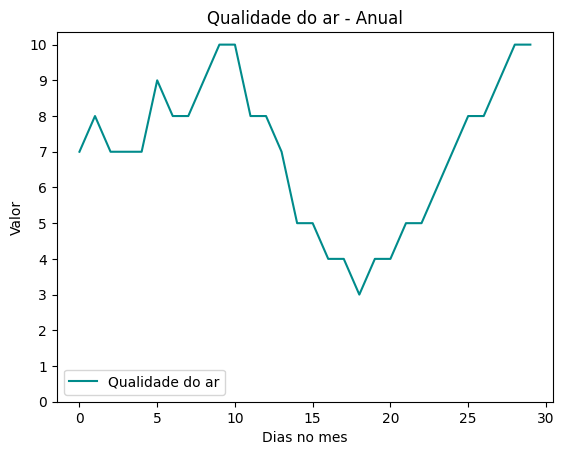

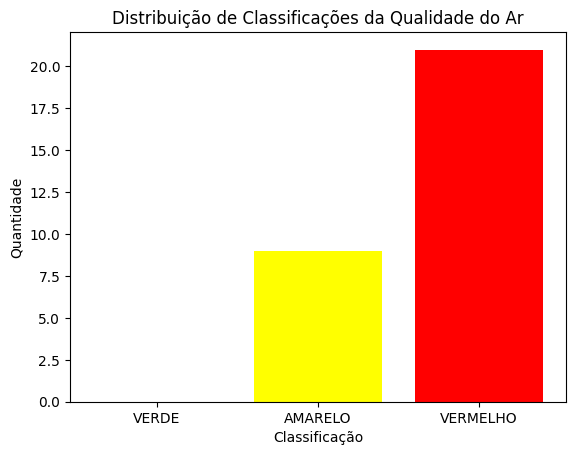



_________________________________
	       MENU
_________________________________
Escolha uma opção:

(1) Selecionar valores de um mes específico
(2) Ver gráfico da qualidade do ar
(3) Ver gráfico da umidade do ar
(4) Ver gráficos de qualidade de ar e umidade combinados
(5) Ver gráfico de qualidade de ar por umidade
(6) Ver gráfico com derivada
(7) Estimar mês com base em valor desejado
(8) Estimar mêses com base de valores 0 a 10
(9) Informar a região para o banco de dados
(10) Ver tabela anual
(0) Sair

Opção: 3




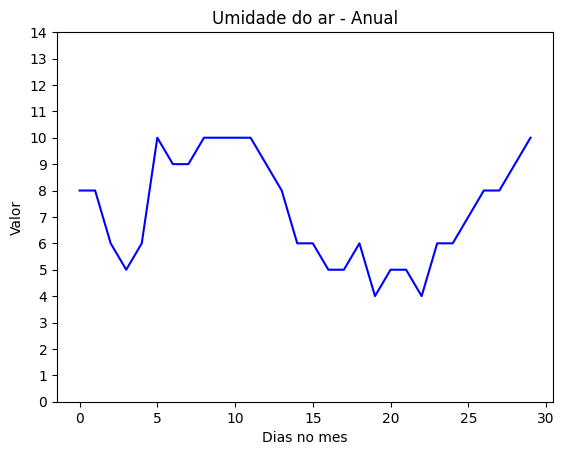



_________________________________
	       MENU
_________________________________
Escolha uma opção:

(1) Selecionar valores de um mes específico
(2) Ver gráfico da qualidade do ar
(3) Ver gráfico da umidade do ar
(4) Ver gráficos de qualidade de ar e umidade combinados
(5) Ver gráfico de qualidade de ar por umidade
(6) Ver gráfico com derivada
(7) Estimar mês com base em valor desejado
(8) Estimar mêses com base de valores 0 a 10
(9) Informar a região para o banco de dados
(10) Ver tabela anual
(0) Sair

Opção: 4




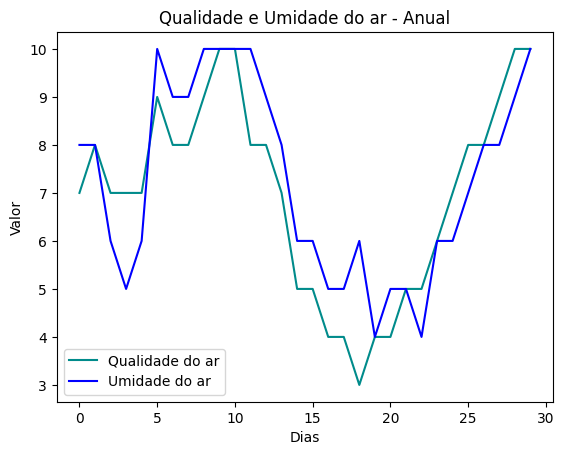



_________________________________
	       MENU
_________________________________
Escolha uma opção:

(1) Selecionar valores de um mes específico
(2) Ver gráfico da qualidade do ar
(3) Ver gráfico da umidade do ar
(4) Ver gráficos de qualidade de ar e umidade combinados
(5) Ver gráfico de qualidade de ar por umidade
(6) Ver gráfico com derivada
(7) Estimar mês com base em valor desejado
(8) Estimar mêses com base de valores 0 a 10
(9) Informar a região para o banco de dados
(10) Ver tabela anual
(0) Sair

Opção: 5


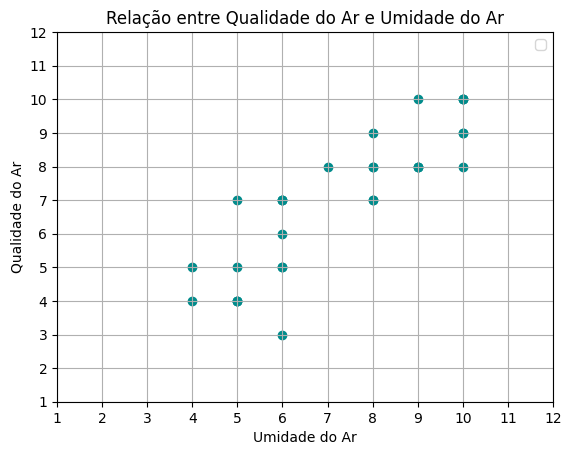



_________________________________
	       MENU
_________________________________
Escolha uma opção:

(1) Selecionar valores de um mes específico
(2) Ver gráfico da qualidade do ar
(3) Ver gráfico da umidade do ar
(4) Ver gráficos de qualidade de ar e umidade combinados
(5) Ver gráfico de qualidade de ar por umidade
(6) Ver gráfico com derivada
(7) Estimar mês com base em valor desejado
(8) Estimar mêses com base de valores 0 a 10
(9) Informar a região para o banco de dados
(10) Ver tabela anual
(0) Sair

Opção: 6




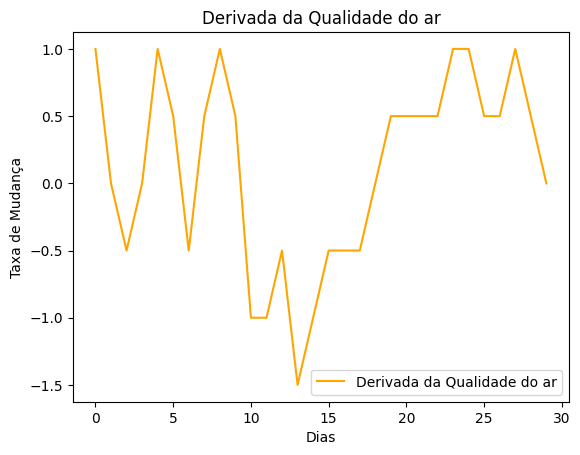



_________________________________
	       MENU
_________________________________
Escolha uma opção:

(1) Selecionar valores de um mes específico
(2) Ver gráfico da qualidade do ar
(3) Ver gráfico da umidade do ar
(4) Ver gráficos de qualidade de ar e umidade combinados
(5) Ver gráfico de qualidade de ar por umidade
(6) Ver gráfico com derivada
(7) Estimar mês com base em valor desejado
(8) Estimar mêses com base de valores 0 a 10
(9) Informar a região para o banco de dados
(10) Ver tabela anual
(0) Sair

Opção: 7


Digite o valor desejado de qualidade do ar: 5
O mês estimado para alcançar a qualidade do ar desejada é: ('May', 'AMARELO')


_________________________________
	       MENU
_________________________________
Escolha uma opção:

(1) Selecionar valores de um mes específico
(2) Ver gráfico da qualidade do ar
(3) Ver gráfico da umidade do ar
(4) Ver gráficos de qualidade de ar e umidade combinados
(5) Ver gráfico de qualidade de ar por umidade
(6) Ver gráfico com derivada
(7) E

In [163]:


class AirQualityAnalyzer:
    def __init__(self,df):
      '''
        função mais importante do codigo pois atribui e compartilha os 'OBJETOS' entre o codigo
      '''
      self.dados_ar = []
      self.dados_umidade = []
      self.df = dados
      self.meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
      self.dataframes_por_mes = {}
      self.opcao = 0

    def exibir_menu(self):
      '''
        MENU PRINCIPAL
      '''
      print('_' * 30)
      print('\n         AXION GREEN')
      print('_' * 30)
      print('\nBem-vindo ao Analisador de Qualidade do Ar\n')
      print('Opções:')
      print("(1) Selecionar os dados lidos")
      print("(2) Ver gráfico da qualidade do ar")
      print("(3) Ver gráfico da umidade do ar")
      print("(4) Ver gráficos de qualidade de ar e umidade combinados")
      print("(5) Ver gráfico de qualidade de ar por umidade")
      print("(6) Ver gráfico com derivada")
      print("(7) Estimar mês com base em valor desejado")
      print("(8) Estimar mêses com base de valores 0 a 10")
      print("(9) Informar a região para o banco de dados")
      print("(10) Ver tabela anual")
      print("(0) Sair\n")


    def classificar_qualidade(self, valor):
      '''
        Classifica as leituras visto o mes selecionado
      '''
      classificacoes = {
            (1, 3): ('VERDE', 'Notone'),
            (3, 6): ('AMARELO', 'Notone'),
            (6, 11): ('VERMELHO', 'Tone')
            }
      for intervalo, (led, buzzer) in classificacoes.items():
          if intervalo[0] <= valor < intervalo[1]:
              return led, buzzer

    def validar_input(self, prompt, valor_minimo, valor_maximo):
      '''
        Tratamento de erros assim podemos apresentar melhor ao usuário os erros
      '''
      while True:
          try:
              valor = int(input(prompt))
              if valor_minimo <= valor <= valor_maximo:
                  return valor
              else:
                  print(f"Digite um número entre {valor_minimo} e {valor_maximo}")
          except ValueError:
              print("Entrada inválida. Digite um número válido.")


    def selecionar_mes_e_inserir_valores(self):
      '''
      Seleciona os meses para a analise mensal
      '''
      for i, mes in enumerate(self.meses, start=1):
        print(f"({i}) {mes}")

      opcao = self.validar_input("Opção: ", 1, len(self.meses))
      mes_selecionado = self.meses[opcao - 1]

      # Acesse o DataFrame do mês selecionado usando query
      df_mes_selecionado = self.df[self.df['mes'] == mes_selecionado]

      if not df_mes_selecionado.empty:
          print('_' * 30)
          print(f"\nValores do mês de {mes_selecionado}:")
          display(df_mes_selecionado)
          return df_mes_selecionado
      else:
          print("Mês não encontrado.")
          return None  # Adicione esta linha



    def inserir_dados(self, df_mes_selecionado):
      '''

      Esta parte do código insere os valores mensais para plotagem de gráfico

      '''
      self.dados_ar = [(valor_gas, self.classificar_qualidade(valor_gas)[0]) for valor_gas in df_mes_selecionado['valor_do_gas']]
      self.dados_umidade = list(df_mes_selecionado['umidade'])
      self.dados_dias = []
      for dia in df_mes_selecionado['dias']:
        self.dados_dias.append(dia)



    def tabela_anual(self):
      '''
        tabela para apresentar a media anual até o momento
      '''
      # Crie listas vazias para armazenar as médias anuais
      medias_anuais_gas = []
      medias_anuais_umid = []

      # Crie um DataFrame para as médias anuais
      df_medias_anuais = pd.DataFrame(columns=['Mês', 'Média_Gás', 'Média_Umidade'])

      # Itere pelos meses e calcule as médias
      for mes, valores_gas in valores_por_mes_gas.items():
          media_gas = sum(valores_gas) // len(valores_gas)
          medias_anuais_gas.append(media_gas)

      for mes, valores_umid in valores_por_mes_umid.items():
          media_umid = sum(valores_umid) // len(valores_umid)
          medias_anuais_umid.append(media_umid)

      # Preencha o DataFrame das médias anuais
      df_medias_anuais['Mês'] = valores_por_mes_gas.keys()
      df_medias_anuais['Média_Gás'] = medias_anuais_gas
      df_medias_anuais['Média_Umidade'] = medias_anuais_umid

      # Exiba o DataFrame das médias anuais
      display(df_medias_anuais)


    def calcular_derivada(self, dados):
      '''

      Função que calcula a derivada dos valores de gas

      '''
      derivada = np.gradient(dados)
      return derivada


    def estimar_mes_valor(self, valor_desejado):
      '''
          fução para estimar o valor do mes medio assim presumimos se melhorará ou não.
      '''
      qualidade_numeros = [ar for ar, _ in self.dados_ar]
      derivada_ar = self.calcular_derivada(qualidade_numeros)

      def funcao_qualidade(mes):
          return qualidade_numeros[int(mes)]

      def derivada_funcao(mes):
          h = 1  # Usar 1 mês de diferença para o cálculo da derivada
          if 0 <= mes < len(qualidade_numeros) - h:
              return (funcao_qualidade(mes + h) - funcao_qualidade(mes)) / h
          else:
              return 0  # Retorna 0 para os casos onde a diferença não é possível

      mes_estimado = None

      for mes_inicial in range(len(qualidade_numeros)):
          mes_atual = mes_inicial
          for _ in range(100):  # Limita o número de iterações
              if derivada_funcao(mes_atual) == 0:
                  break
              mes_atual = mes_atual - (funcao_qualidade(mes_atual) - valor_desejado) / derivada_funcao(mes_atual)
              if 0 <= mes_atual < len(qualidade_numeros):
                  mes_estimado = self.meses[int(np.floor(mes_atual + 0.5))]
                  led, _ = self.classificar_qualidade(valor_desejado)
                  return mes_estimado, led

      return "Não estimado", "Notone"



    def estimar_meses_valores(self):
      '''
        Atraves dos dados há uma previsão de meses futuros (media)
      '''
      for valor_desejado in range(1, 11):
          mes_estimado = self.estimar_mes_valor(valor_desejado)
          _, classificacao = self.classificar_qualidade(valor_desejado)
          print(f"Valor desejado: {valor_desejado}, Mês estimado: {mes_estimado}, Classificação: {classificacao}")




    def plotar_grafico_qualidade(self):
      '''
      Plota os grafico de linha da leitura do ar
      '''
      plt.plot([ar for ar, _ in self.dados_ar], color='darkcyan', label='Qualidade do ar')
      plt.title('Qualidade do ar - Anual')
      plt.xlabel('Dias no mes')
      plt.ylabel('Valor')
      plt.yticks(range(11))
      plt.legend()

      plt.show()
      self.plotar_grafico_barras()  #chama a funcao de plot do grafico de barras



    def plotar_grafico_barras(self):
      '''

      Plota os graficos de qualidade de ar em barra

      '''
      classificacoes = {'VERDE': 0, 'AMARELO': 0, 'VERMELHO': 0}  # array para guardar a qualidade durante o ano

      for _, led in self.dados_ar:
          classificacoes[led] += 1

      classificacoes_nomes = list(classificacoes.keys())
      quantidade = list(classificacoes.values())

      plt.bar(classificacoes_nomes, quantidade, color=['green', 'yellow', 'red'])
      plt.title('Distribuição de Classificações da Qualidade do Ar')
      plt.xlabel('Classificação')
      plt.ylabel('Quantidade')
      plt.show()

    def plotar_grafico_umidade(self):
      '''

      plot do grafico da umnidade do ar em relação aos meses

      '''
      plt.plot(self.dados_umidade, color='blue', label='Umidade do ar')
      plt.title('Umidade do ar - Anual')
      plt.xlabel('Dias no mes')
      plt.ylabel('Valor')
      plt.yticks(range(15))
      plt.show()
      plt.legend()


    def plotar_graficos_combinados(self):
      '''

      junta o grafico de qualidade de ar e a umidade, para analizar as linhas

      '''
      plt.plot([ar for ar, _ in self.dados_ar], color='darkcyan', label='Qualidade do ar')
      plt.plot(self.dados_umidade, color='blue', label='Umidade do ar')
      plt.title('Qualidade e Umidade do ar - Anual')
      plt.xlabel('Dias')
      plt.ylabel('Valor')
      plt.legend()
      plt.show()

    def plotar_grafico_qualidade_por_umidade(self):
      '''

      grafico de despersão para verificar a "reta" crescente/decrescente ao ano

      '''
      qualidade_numeros = [ar for ar, _ in self.dados_ar]
      umidade = self.dados_umidade
      plt.scatter(umidade, qualidade_numeros, color='darkcyan')
      plt.title('Relação entre Qualidade do Ar e Umidade do Ar')
      plt.xlabel('Umidade do Ar')
      plt.ylabel('Qualidade do Ar')
      plt.xticks(range(1, 13))
      plt.yticks(range(1, 13))
      plt.grid()
      plt.legend()
      plt.show()

    def plotar_grafico_derivada_qualidade(self):
      '''
      pega os valores calculados da derivada e plota num gráfico

      '''
      qualidade_numeros = [ar for ar, _ in self.dados_ar]
      derivada_ar = self.calcular_derivada(qualidade_numeros)

      plt.plot(derivada_ar, color='orange', label='Derivada da Qualidade do ar')
      plt.title('Derivada da Qualidade do ar')
      plt.xlabel('Dias')
      plt.ylabel('Taxa de Mudança')
      plt.legend()
      plt.show()


    def menu_nova_operacao(self):
      '''
      Menu após a primeira interação
      '''
      print('\n')
      print("_________________________________")
      print("	       MENU")
      print("_________________________________")
      print("Escolha uma opção:\n")
      print("(1) Selecionar valores de um mes específico")
      print("(2) Ver gráfico da qualidade do ar")
      print("(3) Ver gráfico da umidade do ar")
      print("(4) Ver gráficos de qualidade de ar e umidade combinados")
      print("(5) Ver gráfico de qualidade de ar por umidade")
      print("(6) Ver gráfico com derivada")
      print("(7) Estimar mês com base em valor desejado")
      print("(8) Estimar mêses com base de valores 0 a 10")
      print("(9) Informar a região para o banco de dados")
      print("(10) Ver tabela anual")
      print("(0) Sair\n")

    def informar_regiao(self):
      '''
      API de cep para relizar a analize para cada lugar selecionado
      '''
      print('\n')
      print("_________________________________")
      print("	       CEP                ")
      print("_________________________________")
      cep = input("Digite o CEP da região: ")
      self.verificar_cep(cep)

    def verificar_cep(self, cep):
      '''

      verifica cep com uma API

      '''
      url = f"https://viacep.com.br/ws/{cep}/json/"
      response = requests.get(url)

      if response.status_code == 200:
          endereco = response.json()
          print("\n[ CEP encontrado ]\n")
          print(f"CEP: {endereco['cep']}")
          print(f"Logradouro: {endereco['logradouro']}")
          print(f"Complemento: {endereco['complemento']}")
          print(f"Bairro: {endereco['bairro']}")
          print(f"Cidade: {endereco['localidade']}")
          print(f"Estado: {endereco['uf']}")
          print('\n')
      else:
          print("CEP não encontrado.")



    def main(self):
      '''
      Realiza as interações do usuario para cada opção selecionada
      '''
      self.exibir_menu()

      while self.opcao != 11:
          self.opcao = int(input('Opção: '))
          print('\n')
          if self.opcao == 1:
              #  self.inserir_dados()
              display(self.df)
              df_mes_selecionado = self.selecionar_mes_e_inserir_valores()
              if df_mes_selecionado is not None:
                  self.inserir_dados(df_mes_selecionado)  # Passe o DataFrame do mês selecionado para inserir_dados
          elif self.opcao == 2:
              self.plotar_grafico_qualidade()
          elif self.opcao == 3:
              self.plotar_grafico_umidade()
          elif self.opcao == 4:
              self.plotar_graficos_combinados()
          elif self.opcao == 5:
              self.plotar_grafico_qualidade_por_umidade()
          elif self.opcao == 6:
              self.plotar_grafico_derivada_qualidade()
          elif self.opcao == 7:
              try:
                valor_desejado = self.validar_input("Digite o valor desejado de qualidade do ar: ", 1, 10)
                mes_estimado = self.estimar_mes_valor(valor_desejado)
                print(f"O mês estimado para alcançar a qualidade do ar desejada é: {mes_estimado}")
              except ValueError:
                print("Valor desejado inválido. Digite um número entre 1 e 10.")
          elif self.opcao == 8:
                self.estimar_meses_valores()
          elif self.opcao == 9:
              self.informar_regiao()
          elif self.opcao == 10:
              self.tabela_anual()
          elif self.opcao == 0:
              break
          else:
              print('Opção inválida. Por favor, escolha novamente.')

          self.menu_nova_operacao()

if __name__ == "__main__":
  '''
    INICIA O PROGRAMA
  '''
  analyzer =  AirQualityAnalyzer(df)
  analyzer.main()